In [19]:
import pandas as pd
import requests
from urllib.parse import urlencode
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [6]:
path = 'https://disk.yandex.ru/d/Kl4mPINblwnJCA'

In [7]:
# подготовка ссылок для загрузки в датафреймы
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=path))
response = requests.get(final_url)
download_url = response.json()['href']

In [8]:
df = pd.read_csv(download_url)

In [16]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [10]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [11]:
df.shape

(1143, 11)

In [14]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [18]:
df.dtypes

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [17]:
df.xyz_campaign_id.nunique()

3

In [49]:
df_imp = df.groupby('fb_campaign_id', as_index=False) \
.sum()
#     .agg({'Impressions': 'sum'})
df_imp.Impressions = np.log(df_imp.Impressions)

In [50]:
df_imp

,fb_campaign_id,ad_id,xyz_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,103916,708746,916,15,8.902456,1,1.430000,2,1
1,103917,708749,916,16,9.790375,2,1.820000,2,0
2,103920,708771,916,20,6.541030,0,0.000000,1,0
3,103928,1417633,1832,56,9.035034,2,2.540000,2,1
4,103929,708820,916,29,7.557473,0,0.000000,1,1
...,...,...,...,...,...,...,...,...,...
686,179977,1314410,1178,109,13.937527,252,358.189997,13,2
687,179978,1314411,1178,110,13.365386,120,173.880003,3,0
688,179979,1314412,1178,111,11.928546,28,40.289999,2,0
689,179981,1314414,1178,113,13.580108,135,198.710000,8,2


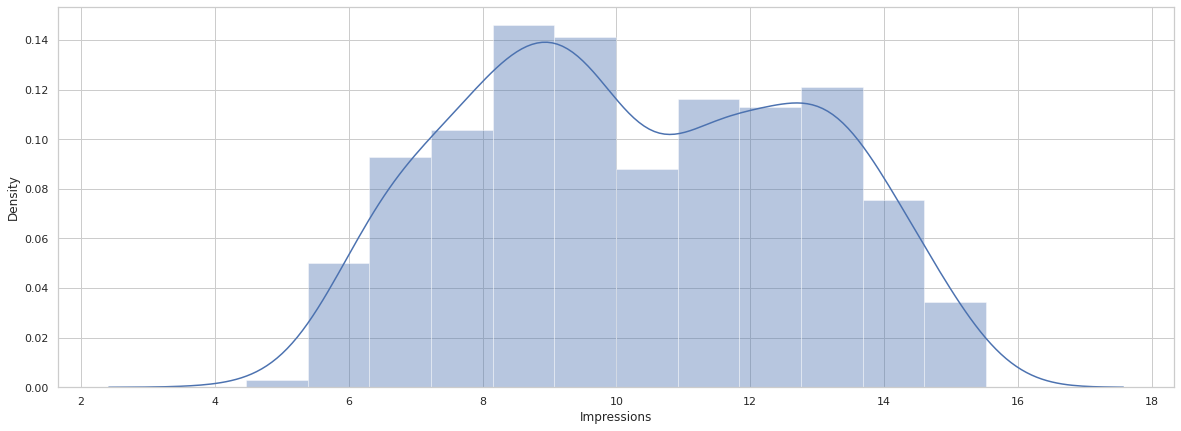

In [52]:
sns.distplot(df_imp.Impressions)

In [55]:
df['ctr'] = df.Clicks / df.Impressions

In [60]:
df.sort_values('ctr')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
434,950109,936,123445,30-34,M,20,343,0,0.00,1,1,0.000000
467,951021,936,123597,30-34,F,7,457,0,0.00,1,1,0.000000
516,952080,936,123774,40-44,F,27,415,0,0.00,1,0,0.000000
181,747879,936,110947,30-34,F,30,493,0,0.00,1,0,0.000000
182,747903,936,110951,30-34,F,63,1491,0,0.00,1,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845


In [63]:
df.loc[df.xyz_campaign_id==916]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1,0.000000
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0,0.000192
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1,0.000091
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0,0.000425
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0,0.000316


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


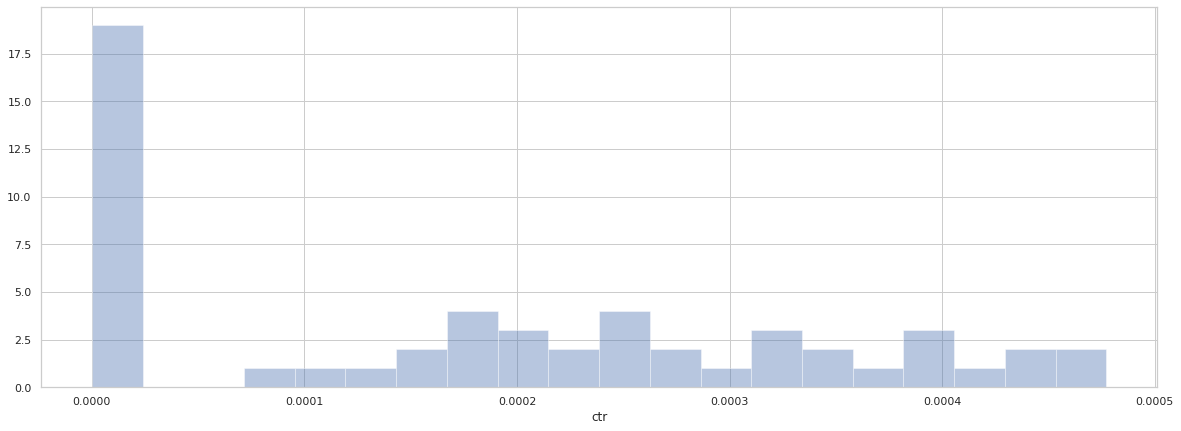

In [66]:
sns.distplot(df.loc[df.xyz_campaign_id==916].ctr, bins=20, kde=False)

In [67]:
df['cpc'] = df.Spent / df.Clicks

In [70]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.25
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.29


In [72]:
round(scipy.stats.iqr(df.cpc, nan_policy='omit'), 2)

0.25

In [74]:
df.groupby('gender').cpc

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


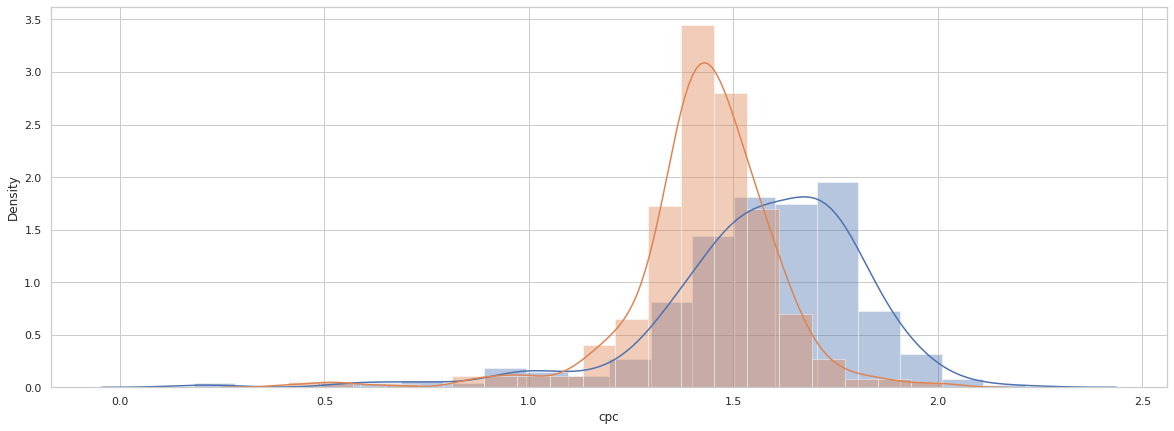

In [86]:
sns.distplot(df.loc[df.gender=='M'].cpc.dropna(), bins=20)
sns.distplot(df.loc[df.gender=='F'].cpc.dropna(), bins=20)

In [87]:
df['cr'] = df.Approved_Conversion / df.Clicks

In [88]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,1.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.007937
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926,0.014815


In [96]:
round((df.loc[df.ad_id==1121814].cr * 100), 2)

860    3.09
Name: cr, dtype: float64